In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [26]:
df = pd.read_csv("apple_products.csv")
df.head(10)

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB
5,"APPLE iPhone 8 Plus (Silver, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,49900,49900,0,3431,356,MOBEXRGVQGYYP8FV,4.6,2 GB
6,"APPLE iPhone 8 Plus (Space Grey, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,49900,49900,0,3431,356,MOBEXRGVQKBREZP8,4.6,2 GB
7,"APPLE iPhone 8 (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-space-...,Apple,77000,77000,0,11202,794,MOBEXRGVZFZGZEWV,4.5,2 GB
8,"APPLE iPhone XS Max (Silver, 64 GB)",https://www.flipkart.com/apple-iphone-xs-max-s...,Apple,89900,89900,0,1454,149,MOBF944E2XAHW8V5,4.6,4 GB
9,"Apple iPhone XR ((PRODUCT)RED, 128 GB) (Includ...",https://www.flipkart.com/apple-iphone-xr-produ...,Apple,41999,52900,20,79512,6796,MOBF9Z7ZHQC23PWQ,4.6,4 GB


In [4]:
df.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [5]:
df.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [48]:
# top 10 highest-rated iPhones in India on Flipkart
highest_rated = df.sort_values(by=["Star Rating"], ascending=False)
highest_rated = highest_rated.head(10)
highest_rated

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
20,"APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)",https://www.flipkart.com/apple-iphone-11-pro-m...,Apple,117100,117100,0,1078,101,MOBFKCTSRYPAQNYT,4.7,4 GB
17,"APPLE iPhone 11 Pro Max (Space Grey, 64 GB)",https://www.flipkart.com/apple-iphone-11-pro-m...,Apple,117100,117100,0,1078,101,MOBFKCTSKDMKCGQS,4.7,4 GB
16,"APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)",https://www.flipkart.com/apple-iphone-11-pro-m...,Apple,131900,131900,0,1078,101,MOBFKCTSCAAKGQV7,4.7,4 GB
15,"APPLE iPhone 11 Pro Max (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-11-pro-m...,Apple,117100,117100,0,1078,101,MOBFKCTSAPAYNSGG,4.7,4 GB
14,"APPLE iPhone 11 Pro Max (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-11-pro-m...,Apple,131900,131900,0,1078,101,MOBFKCTS7HCHSPFH,4.7,4 GB
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
29,"APPLE iPhone 12 (White, 128 GB)",https://www.flipkart.com/apple-iphone-12-white...,Apple,75900,84900,10,2101,180,MOBFWBYZBTZFGJF9,4.6,6 GB
32,"APPLE iPhone 12 Pro Max (Graphite, 128 GB)",https://www.flipkart.com/apple-iphone-12-pro-m...,Apple,120900,129900,6,580,45,MOBFWBYZFDGQSDWS,4.6,6 GB
35,"APPLE iPhone 12 (Black, 128 GB)",https://www.flipkart.com/apple-iphone-12-black...,Apple,75900,84900,10,2101,180,MOBFWBYZK3HACR72,4.6,6 GB
36,"APPLE iPhone 12 (Blue, 128 GB)",https://www.flipkart.com/apple-iphone-12-blue-...,Apple,75900,84900,10,2101,180,MOBFWBYZKPTZF9VG,4.6,6 GB


In [8]:
highest_rated['Product Name']

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
37            APPLE iPhone 12 Pro Max (Silver, 128 GB)
39              APPLE iPhone 12 Pro Max (Gold, 128 GB)
40                     APPLE iPhone 12 (Green, 128 GB)
42                      APPLE iPhone 12 (White, 64 GB)
43                      APPLE iPhone 12 (Black, 64 GB)
Name: Product Name, dtype: object

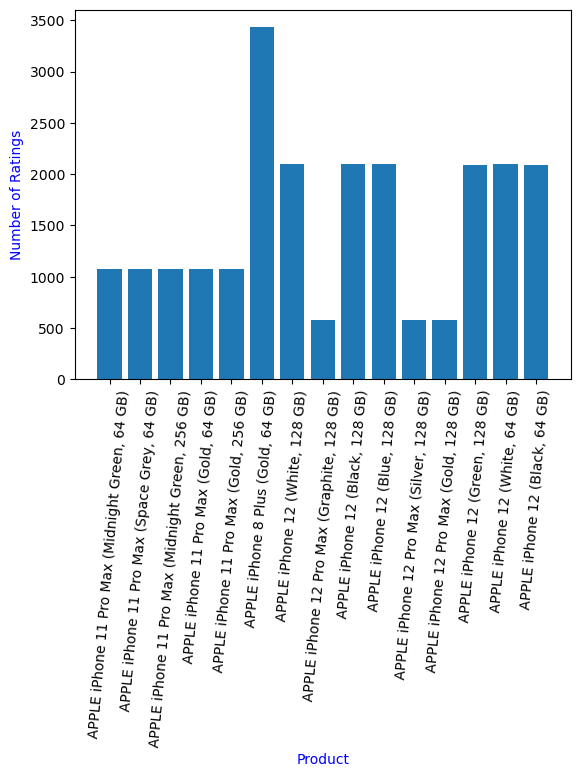

In [9]:
# The ratings of the top-highest-rated iPhones on Flipkart

x = highest_rated["Product Name"]
y = highest_rated["Number Of Ratings"]
plt.xlabel("Product",color="blue")
plt.ylabel("Number of Ratings",color="blue")
plt.title=("Number of Ratings of Highest Rated iPhones")
plt.bar(x,y)
plt.xticks(rotation=85)
plt.show()

[]

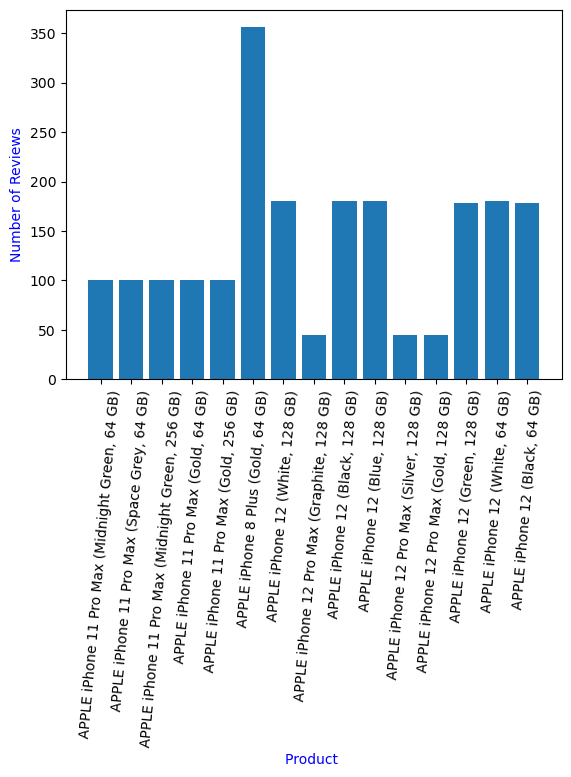

In [10]:
# the number of reviews of the top-highest-rated iPhones on Flipkart
x1=highest_rated["Product Name"]
y1=highest_rated["Number Of Reviews"]
plt.xlabel("Product ",color="blue")
plt.ylabel("Number of Reviews",color="blue")
plt.title = ("Number of Reviews of Highest Rated iPhones")
plt.bar(x1,y1)
plt.xticks(rotation=85)
plt.plot()

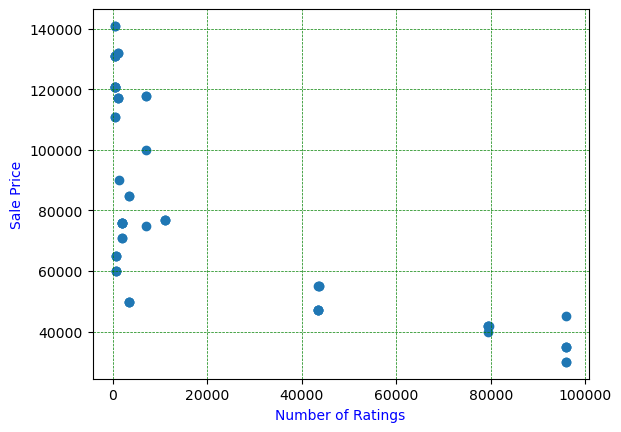

In [34]:
# The relationship between the sale price of iPhones and their ratings on Flipkart

x2=df["Number Of Ratings"]
y2=df["Sale Price"]
plt.title=( "Relationship between Sale Price and Number of Ratings")
plt.xlabel("Number of Ratings",color="blue")
plt.ylabel("Sale Price",color="blue")
plt.scatter(x2,y2)
plt.grid(axis='x',color='green',linestyle='--',linewidth=0.5)
plt.grid(axis='y',color='green',linestyle='--',linewidth=0.5)
plt.show()

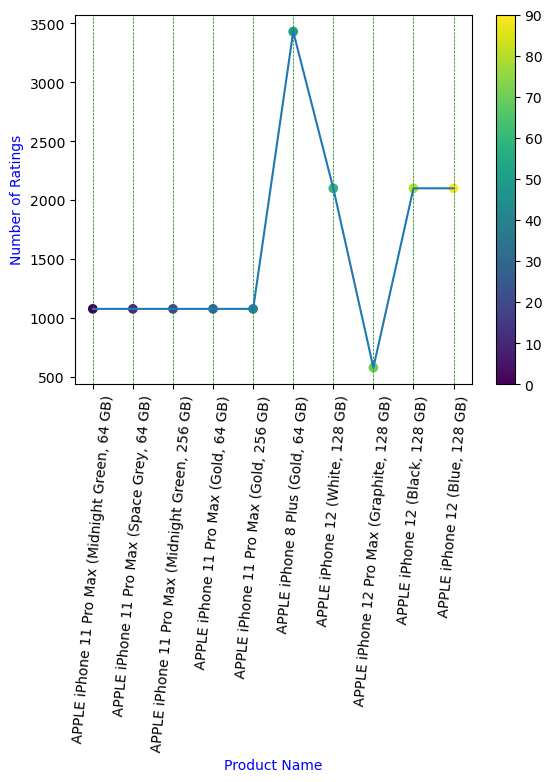

In [52]:
x3=highest_rated["Product Name"]
y3=highest_rated["Number Of Ratings"]
plt.title=( "Relationship between iphone and Number of Ratings")
plt.ylabel("Number of Ratings",color="blue")
plt.xlabel("Product Name",color="blue")
colors = np.array([0,10, 20, 30, 40, 50, 60, 70, 80, 90])

plt.scatter(x3, y3, c=colors, cmap='viridis')

plt.colorbar()
plt.plot(x3,y3)
#plt.scatter(x3,y3)
plt.xticks(rotation=85)
plt.grid(axis='x',color='green',linestyle='--',linewidth=0.5)
plt.show()

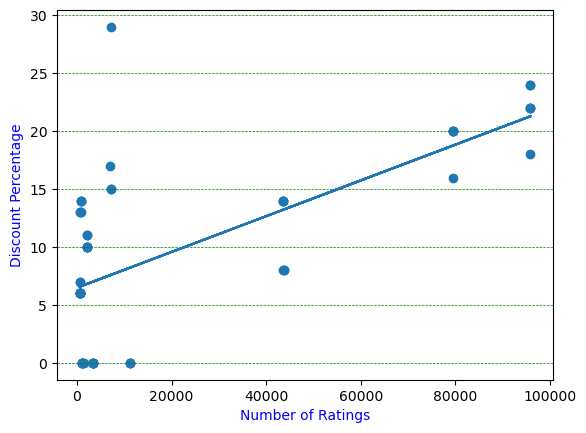

In [54]:
# The relationship between the discount percentage price of iPhones and the number of ratings on Flipkart

x4=df["Number Of Ratings"]
y4=df["Discount Percentage"]
plt.title=( "Relationship between Discount Percentage and Number of Ratings of iPhones")
plt.xlabel("Number of Ratings",color="blue")
plt.ylabel("Discount Percentage",color="blue")
plt.scatter(x4,y4)
z = np.polyfit(x4, y4, 1)
p = np.poly1d(z)
plt.plot(x4, p(x4))
plt.grid(axis='y',color='green',linestyle='--',linewidth=0.5)
plt.show()

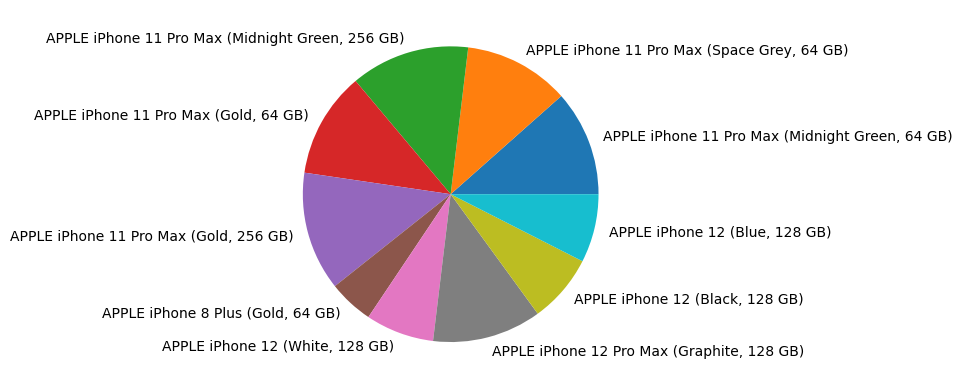

In [62]:
x=highest_rated["Sale Price"]
mylabels=highest_rated["Product Name"]
plt.title=("sales price")
plt.pie(x,labels=mylabels)
plt.show()

In [60]:
highest_rate = df.sort_values(by=["Star Rating"], ascending=False)
highest_rate = highest_rated.head(1)
highest_rate['Star Rating']

20    4.7
Name: Star Rating, dtype: float64